In [165]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
from   pylab import rcParams
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from sklearn import metrics

1.Read the data as an appropriate Time Series data and plot the data.

In [166]:
df = pd.read_csv("Desktop/Rose.csv")
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [167]:
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [168]:
date = pd.date_range(start='1/1/1980', end='31/8/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=188, freq='M')

In [169]:
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [170]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [171]:
df.drop(['YearMonth'], axis=1, inplace=True)

In [172]:
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [173]:
df.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [174]:
df.shape

(187, 1)

In [175]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

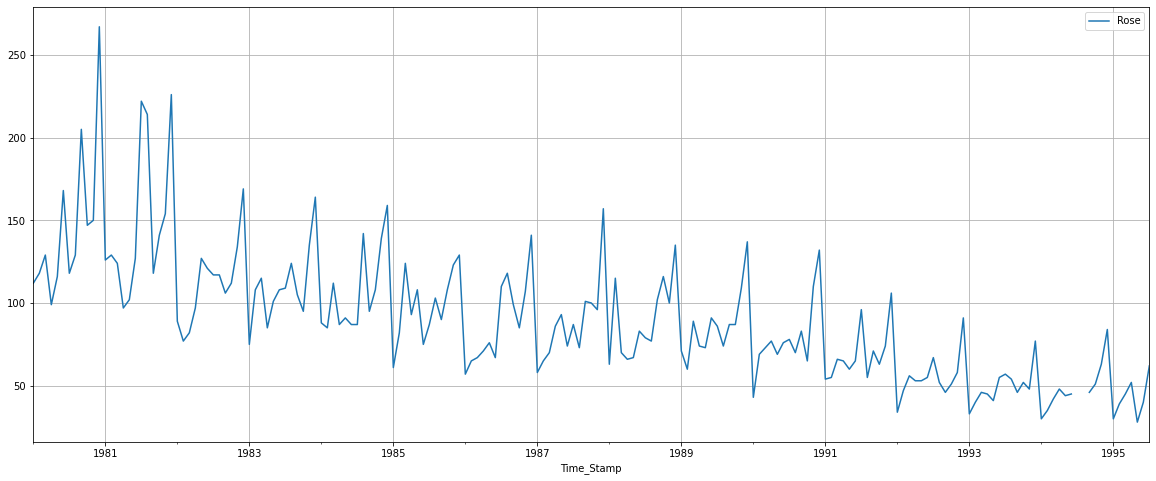

In [176]:
df.plot()
plt.grid();

2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [177]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [178]:
df.isnull().sum()

Rose    2
dtype: int64

In [179]:
df=df.fillna(df.mean())

In [180]:
df.isnull().sum()

Rose    0
dtype: int64

Yearly Boxplot

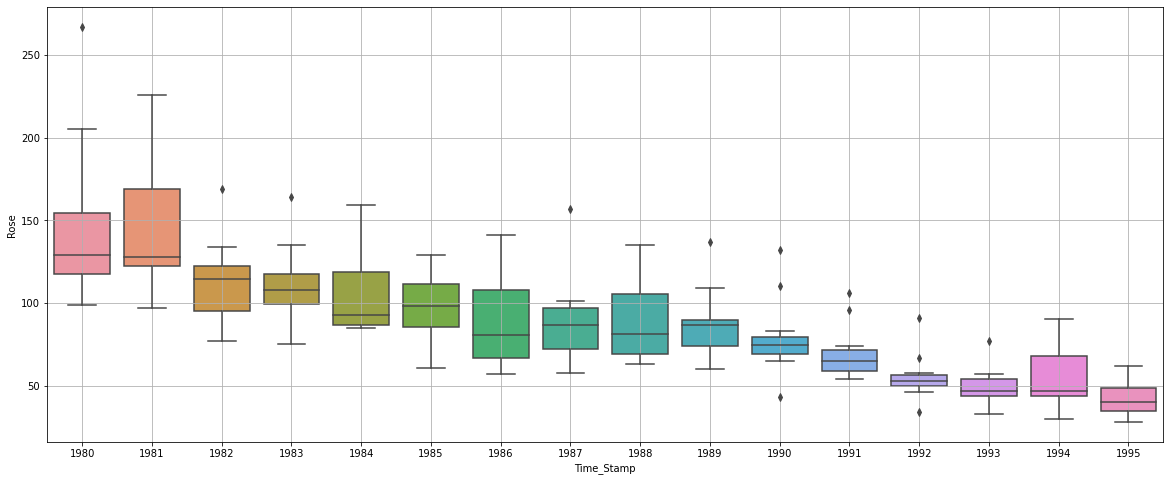

In [181]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

Monthly Boxplot

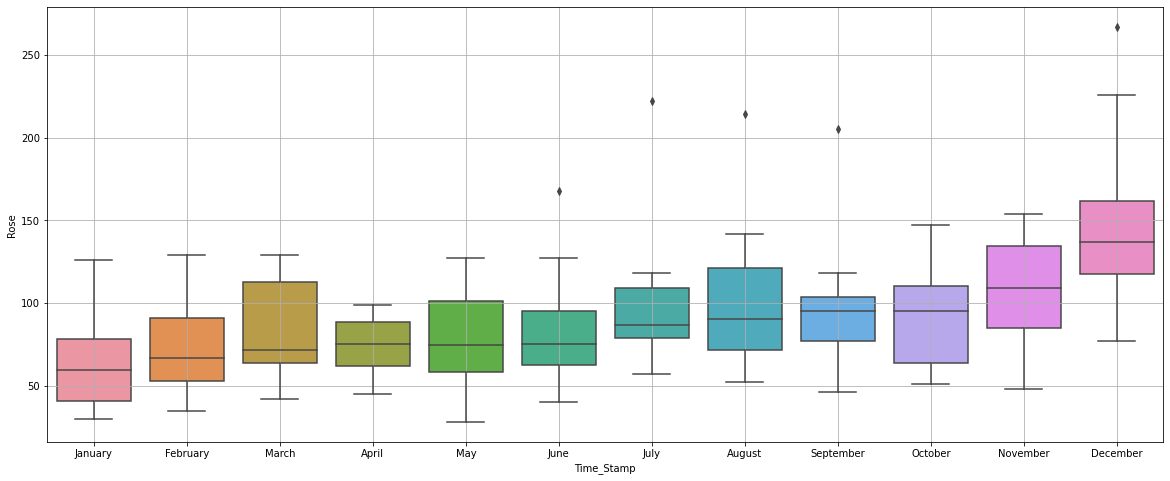

In [182]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

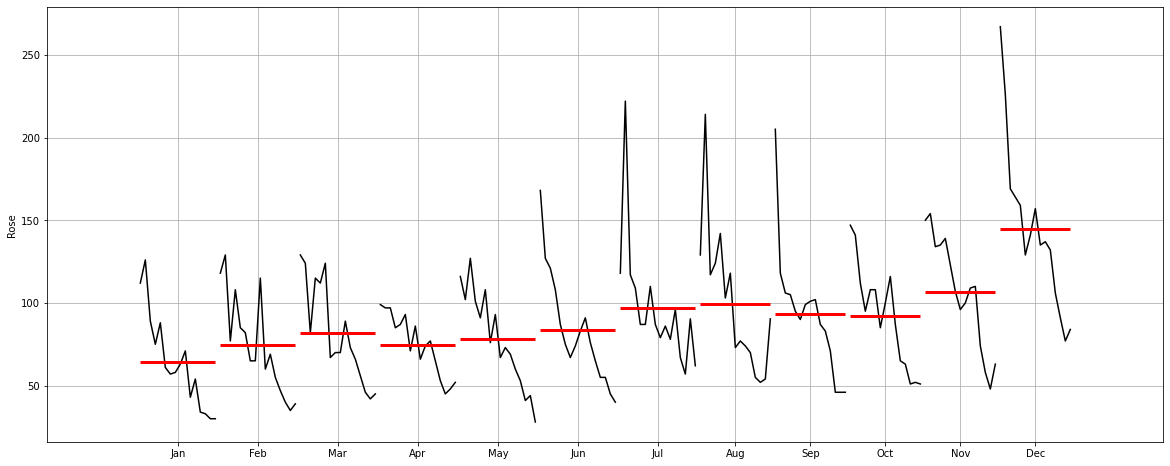

In [183]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df,ylabel='Rose')
plt.grid();

In [184]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


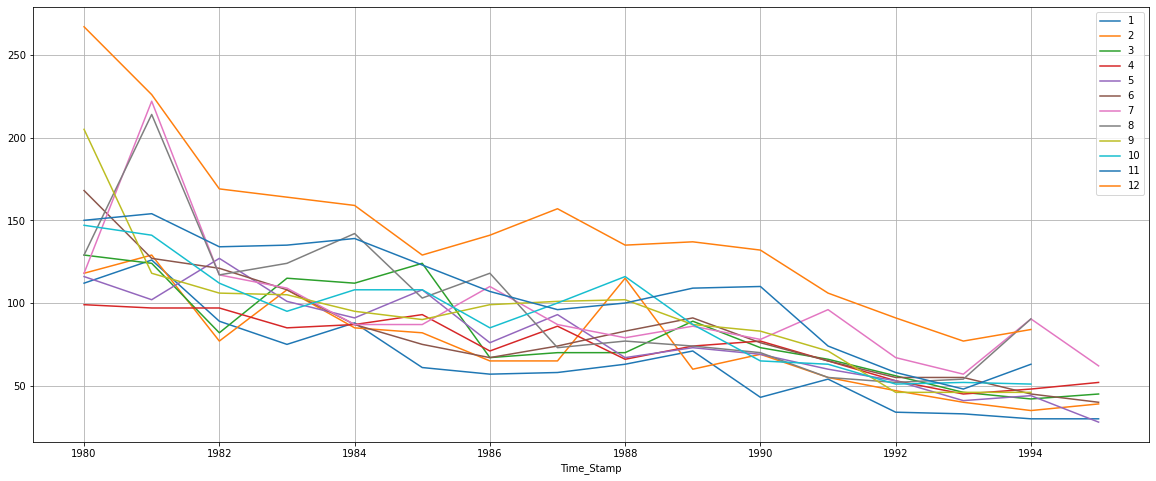

In [185]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

Plotting the Empirical Cumulative Distribution

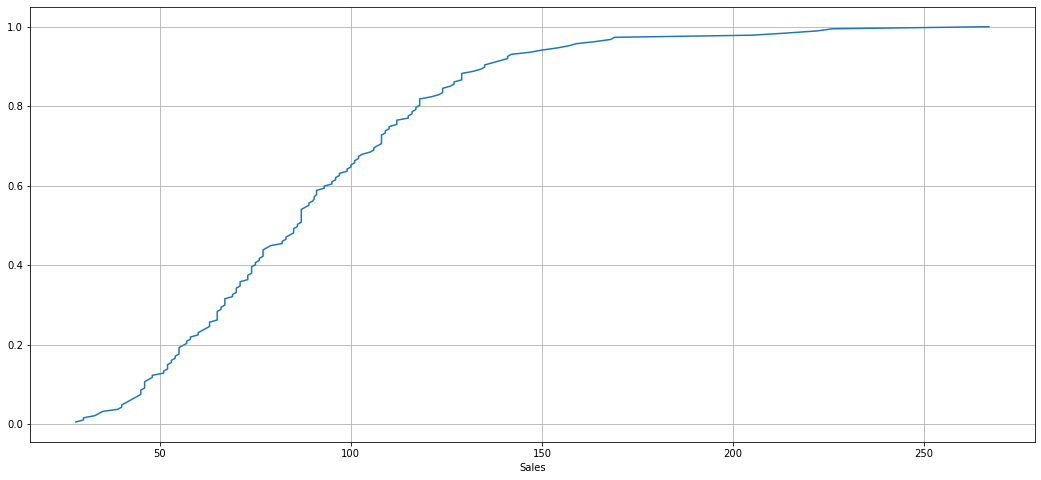

In [186]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

Plotting the average Sparkling Sales per month

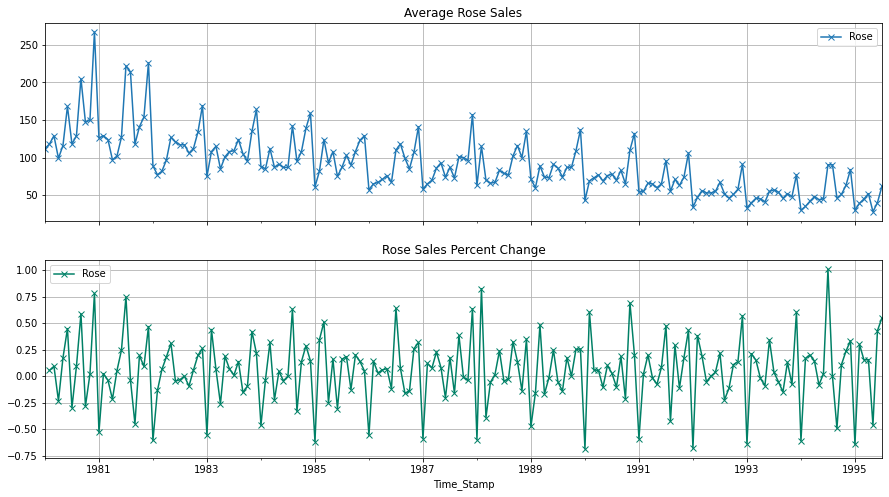

In [187]:
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1 = average.plot(legend=True,ax=axis1,marker='x',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
ax2 = pct_change.plot(legend=True,ax=axis2,marker='x',colormap="summer",title="Rose Sales Percent Change",grid=True)

Decomposition

Additive Decomposition

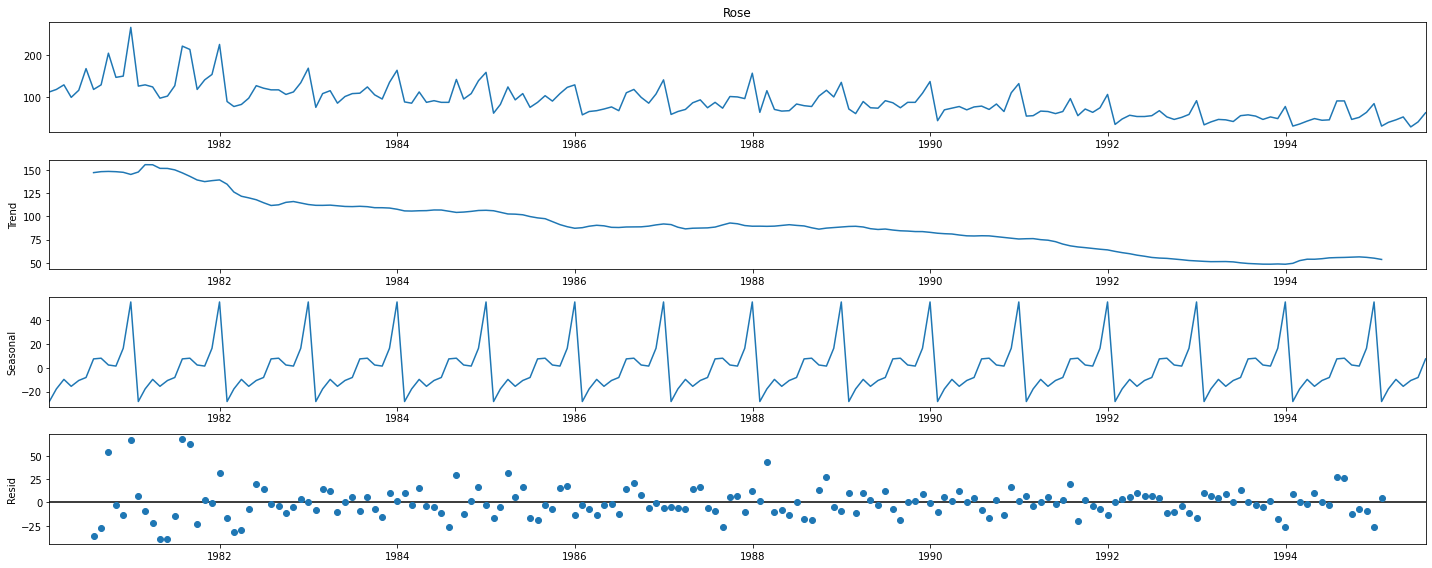

In [188]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df["Rose"],model='additive')
decomposition.plot();

In [189]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [190]:
trend.head(10)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
Name: trend, dtype: float64

In [191]:
seasonality.head(10)

Time_Stamp
1980-01-31   -28.403723
1980-02-29   -17.833219
1980-03-31    -9.816537
1980-04-30   -15.629037
1980-05-31   -10.727251
1980-06-30    -8.209394
1980-07-31     7.405916
1980-08-31     7.986472
1980-09-30     2.279610
1980-10-31     1.376832
Name: seasonal, dtype: float64

In [192]:
residual.head(10)

Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.489250
1980-08-31   -27.111472
1980-09-30    54.345390
1980-10-31    -2.460165
Name: resid, dtype: float64

Multiplicative Decomposition

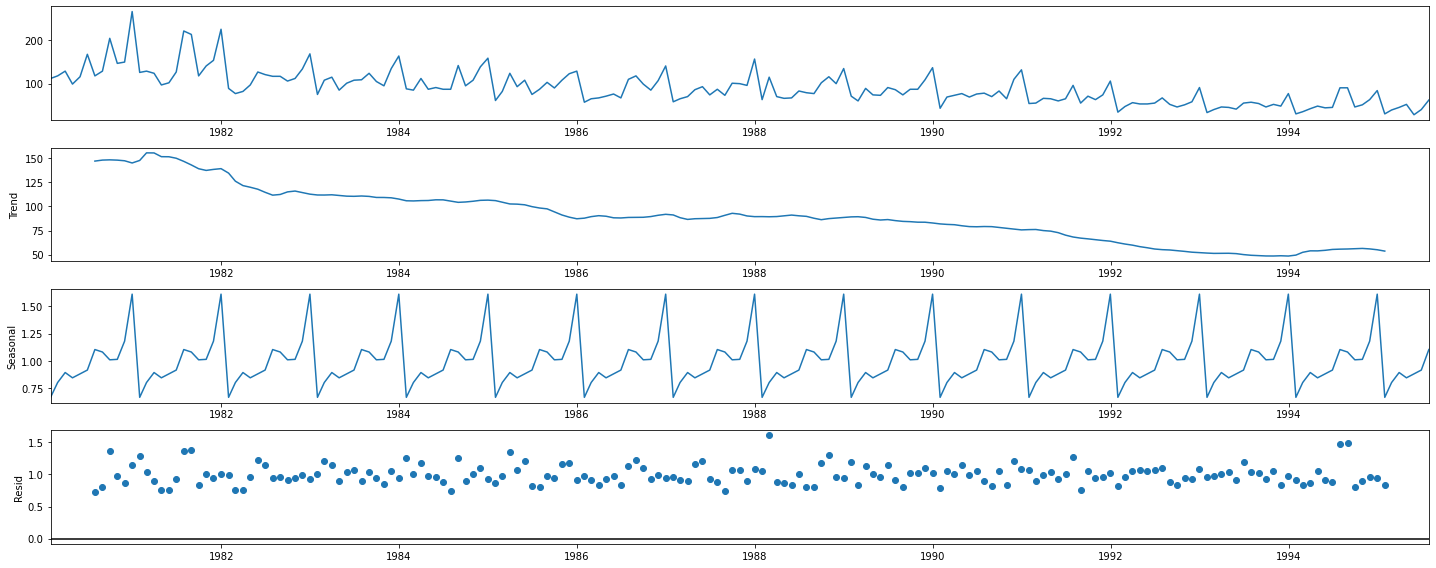

In [193]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [194]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [195]:
trend.head(10)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
Name: trend, dtype: float64

In [196]:
seasonality.head(10)

Time_Stamp
1980-01-31    0.664388
1980-02-29    0.800694
1980-03-31    0.892495
1980-04-30    0.844044
1980-05-31    0.880516
1980-06-30    0.915220
1980-07-31    1.103899
1980-08-31    1.081169
1980-09-30    1.009574
1980-10-31    1.013692
Name: seasonal, dtype: float64

In [197]:
residual.head(10)

Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.726757
1980-08-31    0.805504
1980-09-30    1.368532
1980-10-31    0.979276
Name: resid, dtype: float64

Plotting the Autocorrelation and the Partial Autocorrelation function plots

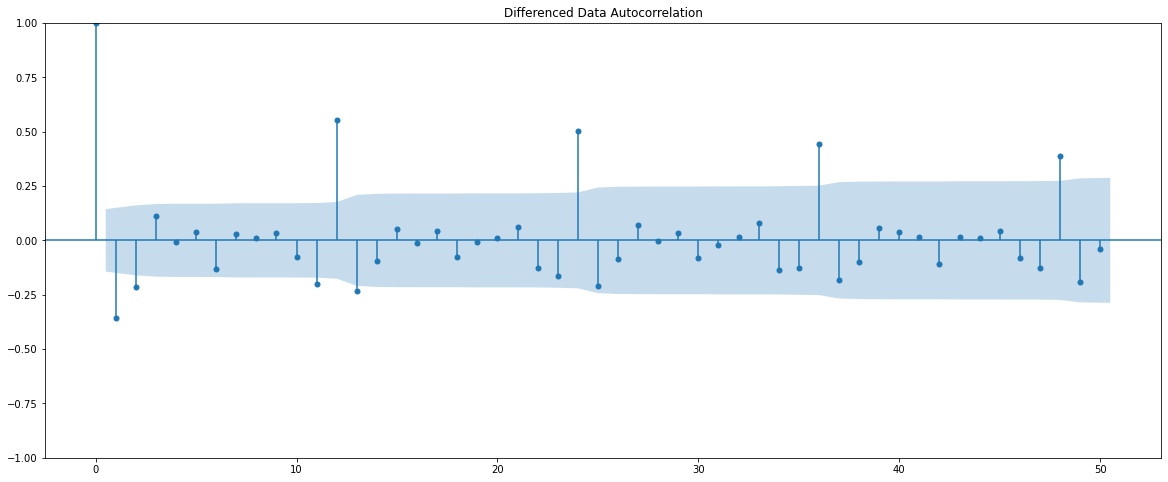

In [198]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

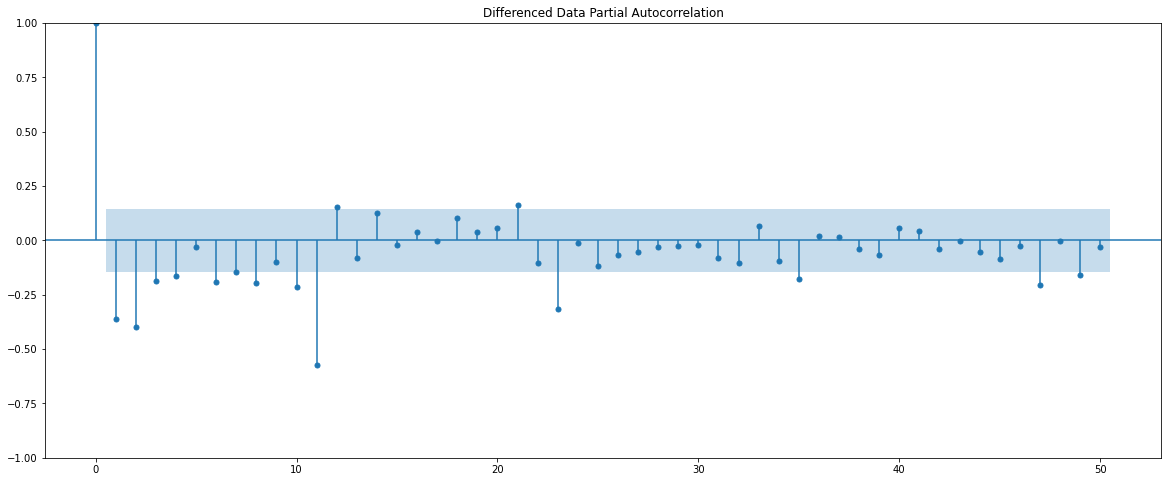

In [199]:
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

3.Split the data into training and test. The test data should start in 1991.

In [200]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [201]:
train.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [202]:
train.tail()

,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [203]:
test.head()

,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


In [204]:
test.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


Checking for stationarity of the Training Data Time Series

In [205]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

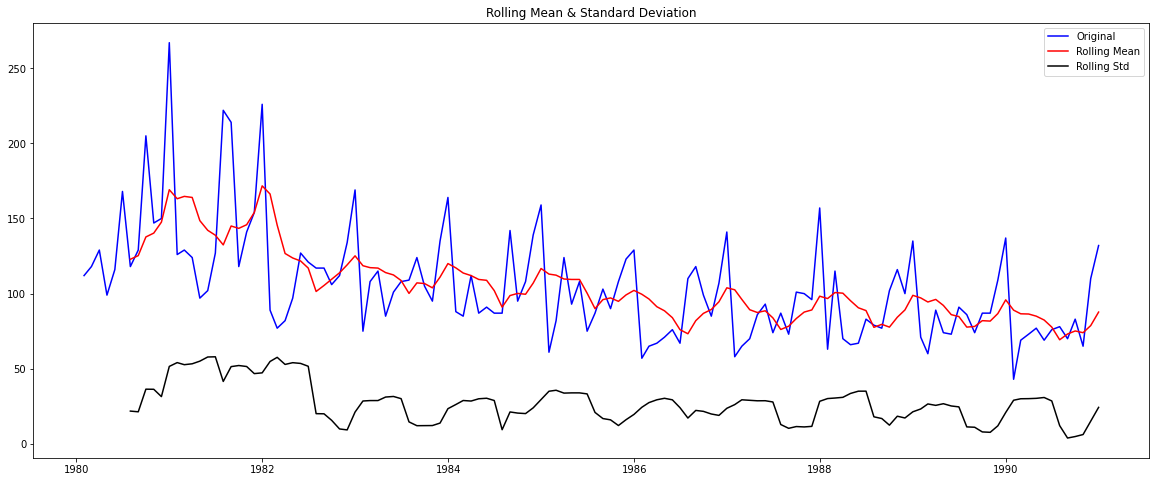

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [206]:
test_stationarity(train['Rose'])

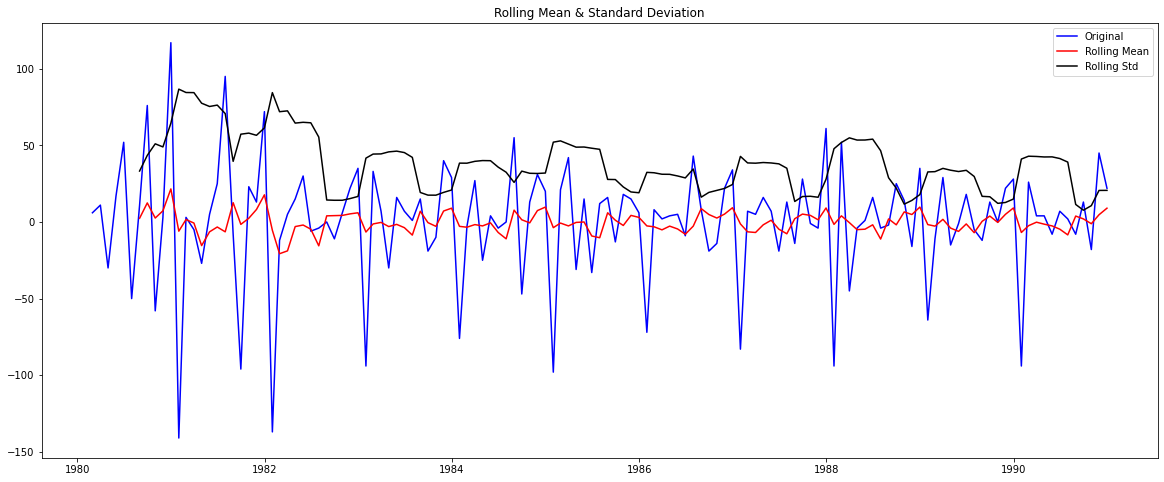

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [207]:
test_stationarity(train['Rose'].diff().dropna())

In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


4.Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

Simple Exponential Smoothing model

In [209]:
SES_train = train.copy()
SES_test = test.copy()

In [210]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True)

In [211]:
model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [212]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    87.104997
1991-02-28    87.104997
1991-03-31    87.104997
1991-04-30    87.104997
1991-05-31    87.104997
1991-06-30    87.104997
1991-07-31    87.104997
1991-08-31    87.104997
1991-09-30    87.104997
1991-10-31    87.104997
1991-11-30    87.104997
1991-12-31    87.104997
1992-01-31    87.104997
1992-02-29    87.104997
1992-03-31    87.104997
1992-04-30    87.104997
1992-05-31    87.104997
1992-06-30    87.104997
1992-07-31    87.104997
1992-08-31    87.104997
1992-09-30    87.104997
1992-10-31    87.104997
1992-11-30    87.104997
1992-12-31    87.104997
1993-01-31    87.104997
1993-02-28    87.104997
1993-03-31    87.104997
1993-04-30    87.104997
1993-05-31    87.104997
1993-06-30    87.104997
1993-07-31    87.104997
1993-08-31    87.104997
1993-09-30    87.104997
1993-10-31    87.104997
1993-11-30    87.104997
1993-12-31    87.104997
1994-01-31    87.104997
1994-02-28    87.104997
1994-03-31    87.104997
1994-04-30    87.104997
1994-05-31    87.104997
1994-06-30    87

Plotting the Training data, Test data and the forecasted values

Plotting the Training data, Test data and the forecasted values

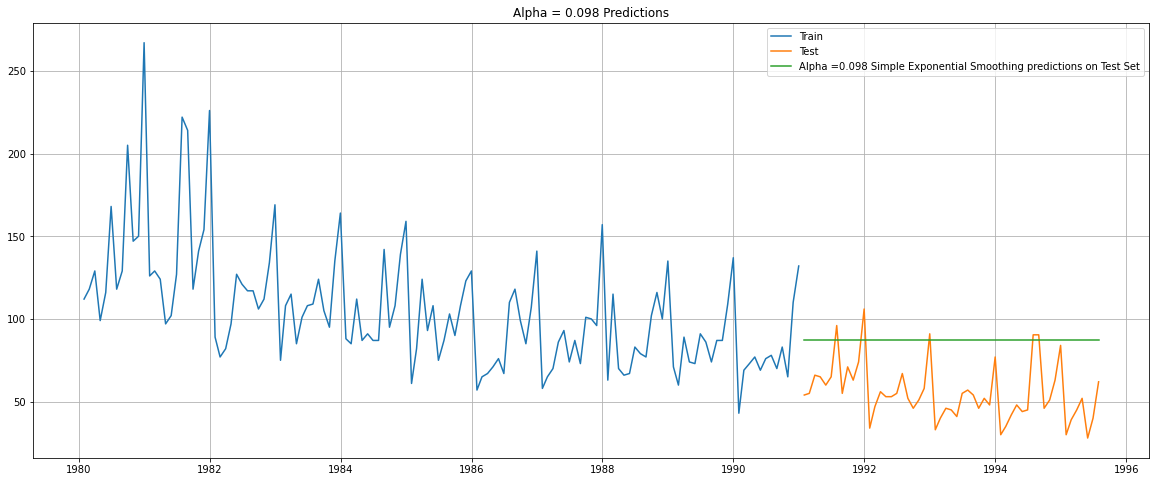

In [213]:
rcParams['figure.figsize'] = 20,8
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098 Predictions');

In [214]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [215]:
print('Simple Exponential Smoothing RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
print('Simple Exponential Smoothing RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

Simple Exponential Smoothing RMSE: 35.93621071651502
Simple Exponential Smoothing RMSE (calculated using statsmodels): 35.93621071651501


In [216]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha= 0.07, SES'])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211


Double Exponential Smoothing

In [217]:
DES_train = train.copy()
DES_test = test.copy()

In [218]:
model_DES = Holt(train,initialization_method='estimated')
model_DES = model_DES.fit()
print('')
print('Holt model Exponential Smoothing Estimated Parameters')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [219]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    72.063238
1991-02-28    71.568859
1991-03-31    71.074481
1991-04-30    70.580103
1991-05-31    70.085725
1991-06-30    69.591347
1991-07-31    69.096969
1991-08-31    68.602590
1991-09-30    68.108212
1991-10-31    67.613834
1991-11-30    67.119456
1991-12-31    66.625078
1992-01-31    66.130699
1992-02-29    65.636321
1992-03-31    65.141943
1992-04-30    64.647565
1992-05-31    64.153187
1992-06-30    63.658808
1992-07-31    63.164430
1992-08-31    62.670052
1992-09-30    62.175674
1992-10-31    61.681296
1992-11-30    61.186918
1992-12-31    60.692539
1993-01-31    60.198161
1993-02-28    59.703783
1993-03-31    59.209405
1993-04-30    58.715027
1993-05-31    58.220648
1993-06-30    57.726270
1993-07-31    57.231892
1993-08-31    56.737514
1993-09-30    56.243136
1993-10-31    55.748757
1993-11-30    55.254379
1993-12-31    54.760001
1994-01-31    54.265623
1994-02-28    53.771245
1994-03-31    53.276866
1994-04-30    52.782488
1994-05-31    52.288110
1994-06-30    51

Plotting the Training data, Test data and the forecasted values

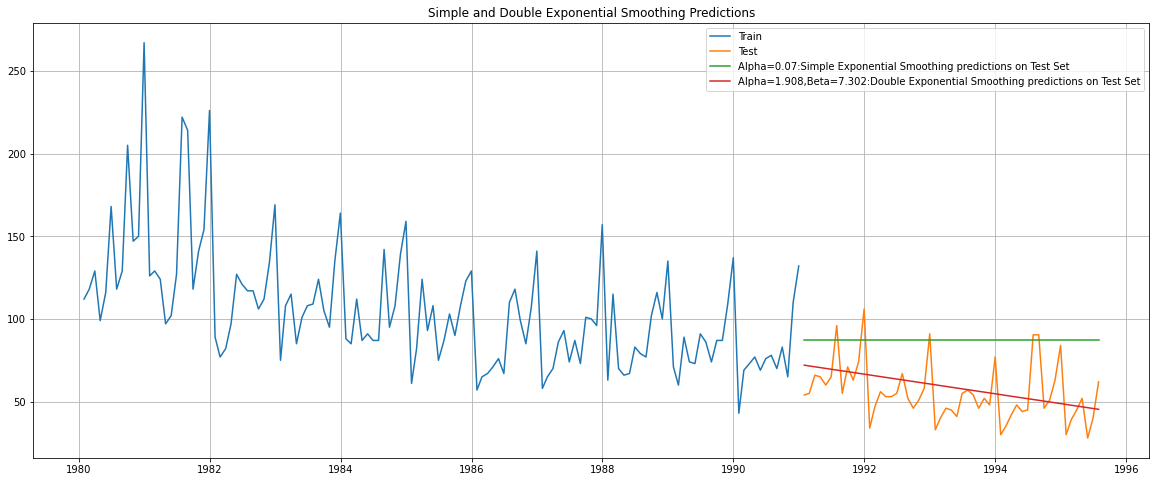

In [220]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.908,Beta=7.302:Double Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [221]:
print('Double Exponential Smoothing RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

Double Exponential Smoothing RMSE: 16.979407626324168


In [222]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha= 1.908, Beta= 7.302, DES'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408


Triple Exponential Smoothing

In [223]:
TES_train = train.copy()
TES_test = test.copy()

In [224]:
model_TES=ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES=model_TES.fit()
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
       -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
         4.79381122,   2.96110122,  21.05738849,  63.18279918]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [225]:
TES_predict = model_TES.forecast(len(test))
TES_predict

1991-01-31     42.684928
1991-02-28     54.564005
1991-03-31     61.995209
1991-04-30     50.852018
1991-05-31     59.034271
1991-06-30     63.850901
1991-07-31     73.190805
1991-08-31     78.724624
1991-09-30     74.276280
1991-10-31     71.895000
1991-11-30     89.444365
1991-12-31    131.042724
1992-01-31     36.119272
1992-02-29     47.998349
1992-03-31     55.429553
1992-04-30     44.286362
1992-05-31     52.468615
1992-06-30     57.285245
1992-07-31     66.625149
1992-08-31     72.158968
1992-09-30     67.710624
1992-10-31     65.329344
1992-11-30     82.878709
1992-12-31    124.477068
1993-01-31     29.553616
1993-02-28     41.432693
1993-03-31     48.863898
1993-04-30     37.720706
1993-05-31     45.902959
1993-06-30     50.719589
1993-07-31     60.059493
1993-08-31     65.593312
1993-09-30     61.144968
1993-10-31     58.763688
1993-11-30     76.313053
1993-12-31    117.911412
1994-01-31     22.987961
1994-02-28     34.867037
1994-03-31     42.298242
1994-04-30     31.155050


Plotting the Training data, Test data and the forecasted values

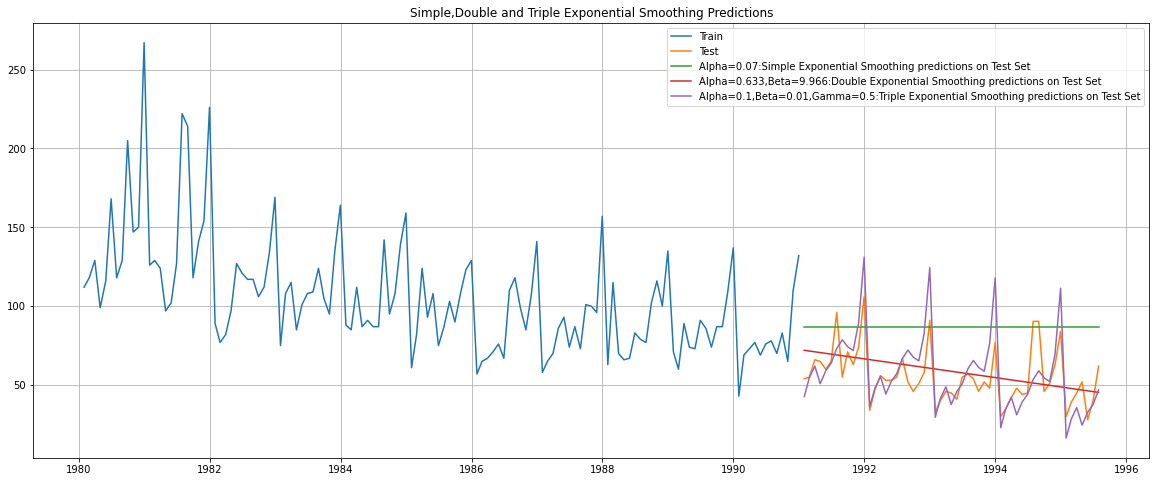

In [226]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.633,Beta=9.966:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.1,Beta=0.01,Gamma=0.5:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [227]:
print('Triple Exponential Smoothing RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

Triple Exponential Smoothing RMSE: 15.531988454745218


In [228]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.1, Beta=0.01, Gamma=0.5, TES'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988


In [229]:
TES_train = train.copy()
TES_test = test.copy()

In [230]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [231]:
model_TES_autofit = model_TES.fit()

In [232]:
model_TES_autofit.params

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Prediction on the test data

In [233]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.321655
1991-02-28,55.0,63.664690
1991-03-31,66.0,69.374024
1991-04-30,65.0,60.435528
1991-05-31,60.0,67.758341


Plotting on both the Training and Test using autofit

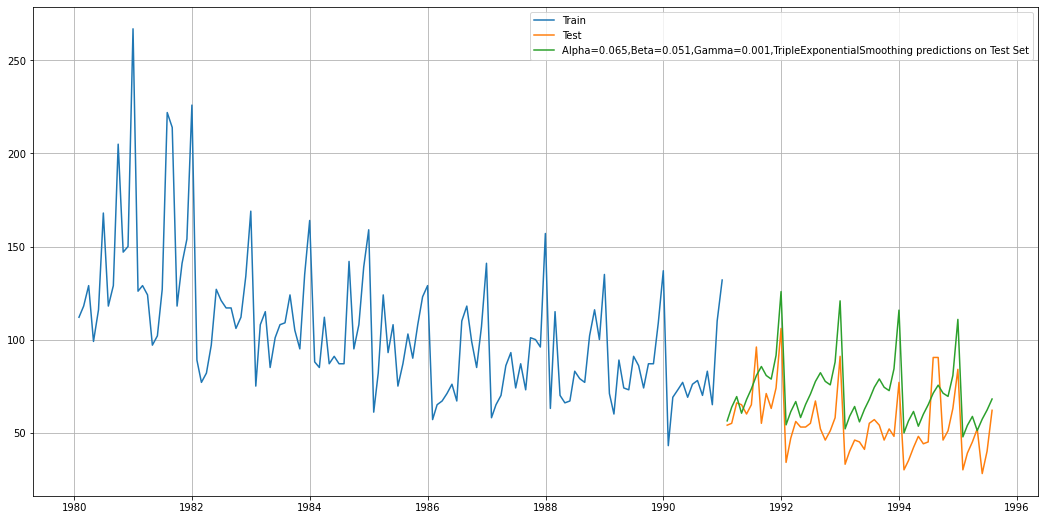

In [234]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

Test Data

In [235]:
rmse_model_test_1 = mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.065,Beta=0.051,Gamma=0.001, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_test_1))

For Alpha=0.065,Beta=0.051,Gamma=0.001, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 19.714


In [236]:
resultsDf_8_2 = pd.DataFrame({'Test RMSE': [rmse_model_test_1]}
                           ,index=['Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExponentialSmoothing'])
resultsDf_8_2 = pd.concat([resultsDf, resultsDf_temp])
resultsDf_8_2

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988


In [237]:
resultsDf_8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [238]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [239]:
resultsDf_8.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
1,0.3,0.3,0.4,24.588120,13.623711
9,0.3,0.4,0.4,25.599445,14.115130
24,0.3,0.6,0.3,25.815213,16.725408
80,0.4,0.5,0.3,26.917917,17.264252
8,0.3,0.4,0.3,24.131323,18.646154


Linear Regression

In [240]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [241]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [242]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [243]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [244]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

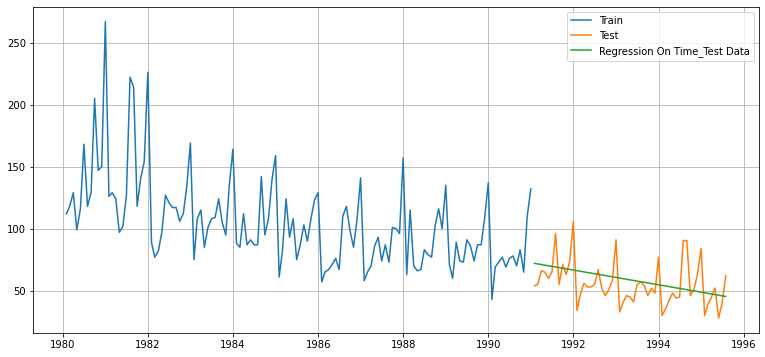

In [245]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [246]:
rmse_model1_test = mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 16.979


In [247]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model1_test]}
                           ,index=['Regression'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
Regression,16.979414


Naive Approach

In [248]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [249]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

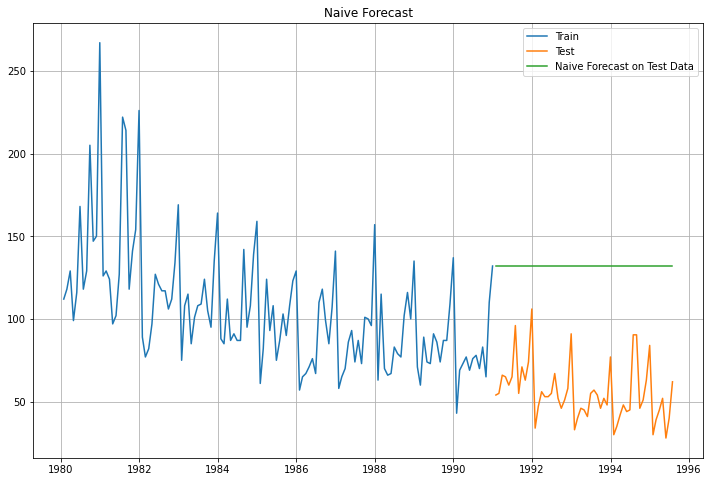

In [250]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Test Data - RMSE

In [251]:
rmse_model2_test = mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.396


In [252]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
Regression,16.979414
Naive Model,78.396083


Simple Average

In [253]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [254]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


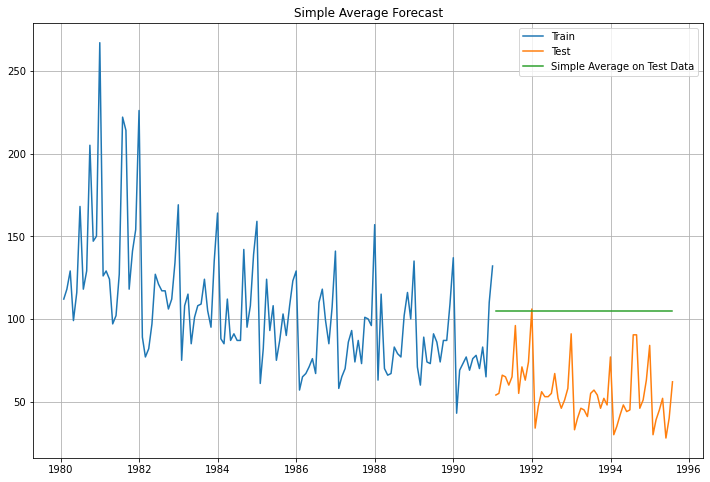

In [255]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Test Data - RMSE

In [256]:
rmse_model3_test = mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.319


In [257]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
Regression,16.979414
Naive Model,78.396083
Simple Average Model,52.318735


Moving Average

In [258]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [259]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

Plotting on both the Training and Test data

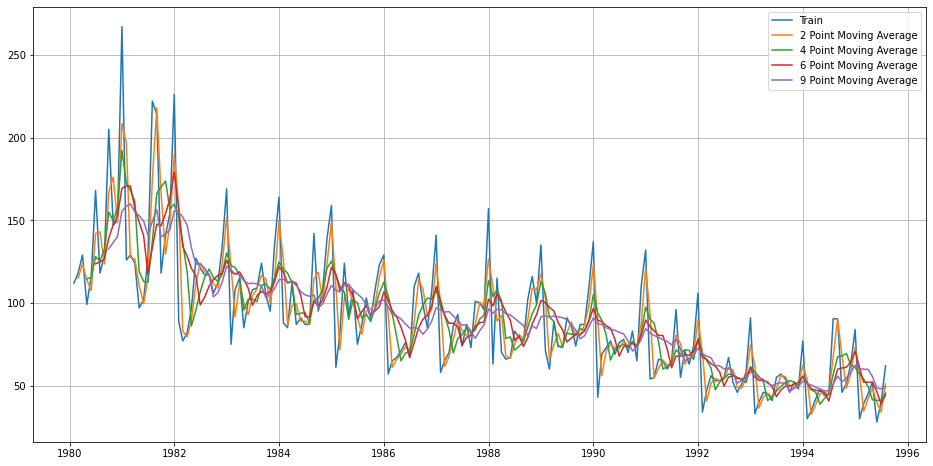

In [260]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [261]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>=1991]

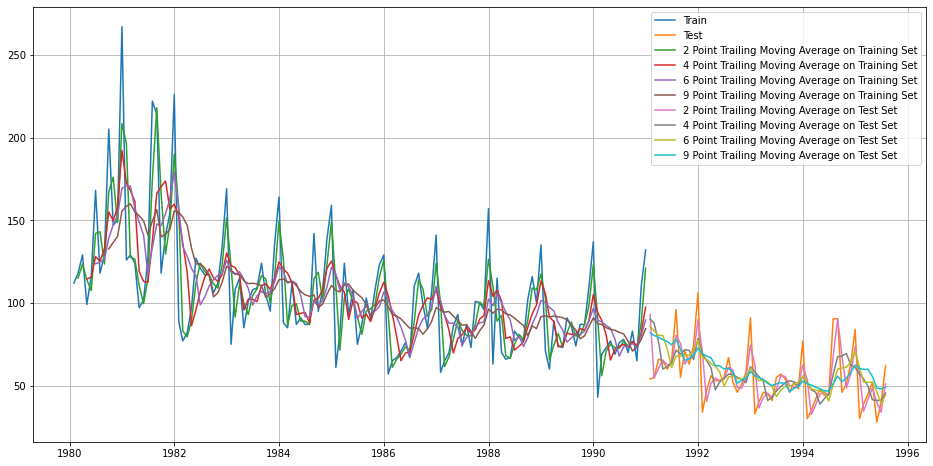

In [262]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [263]:
rmse_model4_test_2 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))
rmse_model4_test_4 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))
rmse_model4_test_6 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))
rmse_model4_test_9 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.298
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.846
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.986
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.501 


In [264]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2point Trailing Moving Average','4 point Trailing Moving Average'
                                   ,'6point Trailing Moving Average','9 point Trailing Moving Average'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
Regression,16.979414
Naive Model,78.396083
Simple Average Model,52.318735
2point Trailing Moving Average,12.298291
4 point Trailing Moving Average,15.845558
6point Trailing Moving Average,15.986163
9 point Trailing Moving Average,16.500823


5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [265]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.443
DF test p-value is 0.357125044845598
Number of lags used 12


In [266]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.988
DF test p-value is 7.599609649112543e-11
Number of lags used 12


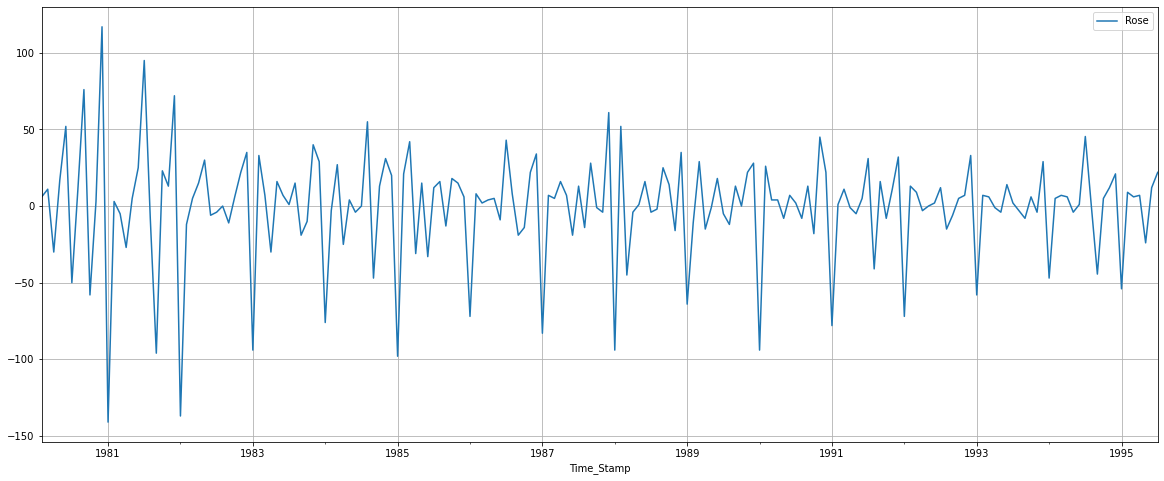

In [267]:
df.diff().dropna().plot(grid=True);

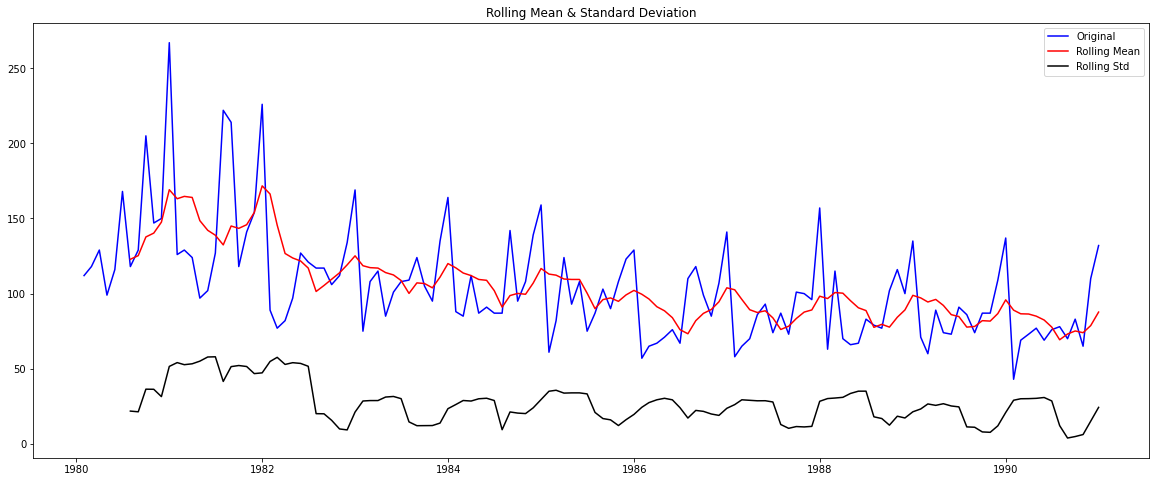

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [268]:
test_stationarity(train['Rose'])

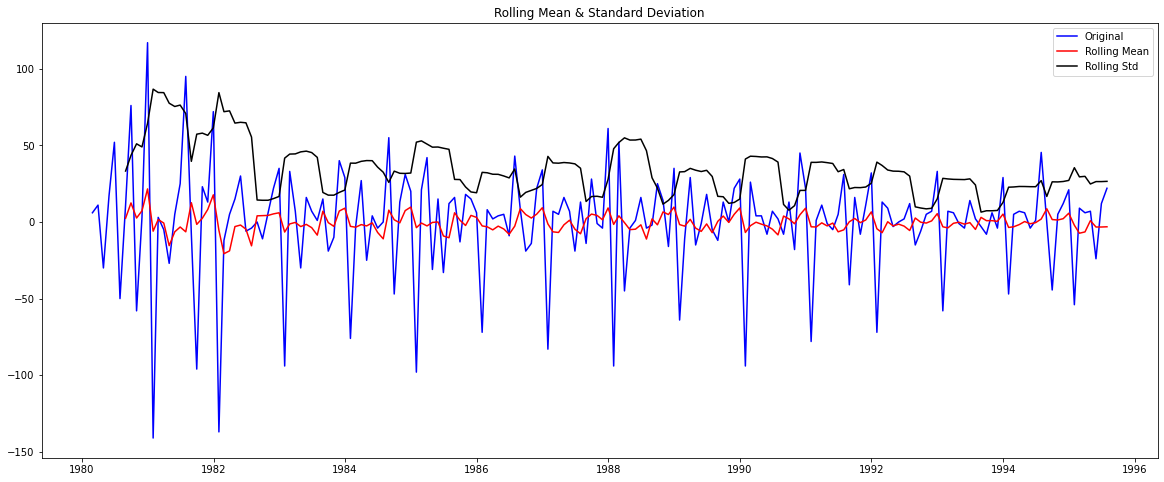

Results of Dickey-Fuller Test:
Test Statistic                -7.855944e+00
p-value                        5.442646e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [269]:
test_stationarity(df['Rose'].diff().dropna())

6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [270]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [271]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [272]:
import statsmodels.api as sm
for param in pdq:
    ARIMA_model = sm.tsa.arima.ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535788
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543
ARIMA(2, 1, 2) - AIC:1281.870722226434


In [273]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.57423
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [274]:
auto_ARIMA = sm.tsa.arima.ARIMA(train['Rose'], order=(0,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 26 Mar 2023   AIC                           1279.672
Time:                        23:26:57   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

Predict on the Test Set using this model

In [275]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

36.441015317676566


Test Data - RMSE 

In [276]:
rmse_model4_test = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print("For ARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For ARIMA on the Test Data,  RMSE is 36.441


In [277]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test]},index=['ARIMA(0,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
Regression,16.979414
Naive Model,78.396083
Simple Average Model,52.318735
2point Trailing Moving Average,12.298291
4 point Trailing Moving Average,15.845558
6point Trailing Moving Average,15.986163
9 point Trailing Moving Average,16.500823


Auto Sarima

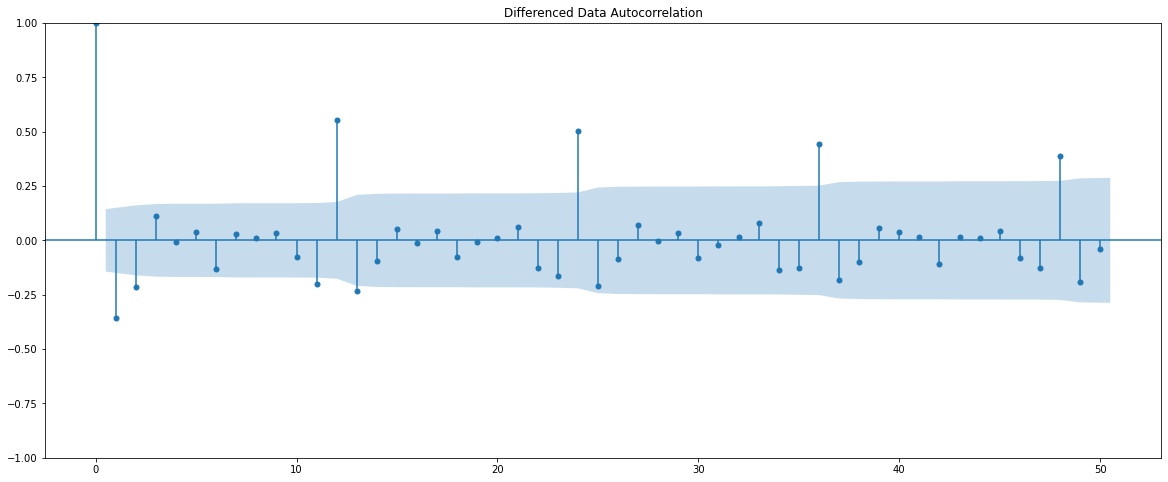

In [278]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

Setting the seasonality as 6 for the first iteration of the auto SARIMA model

In [279]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [280]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [281]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113852
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.707747182733
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149084
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722076
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515258
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426162297
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029554
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752784
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745055
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746538
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564123853737
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.749037998232
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455189147332
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082631828
SARIMA(0, 1, 2)x(0, 0, 0, 6) -

In [282]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655819
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.22055
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.77847


In [283]:
import statsmodels.api as sm
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 26 Mar 2023   AIC                           1041.656
Time:                                   23:27:19   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.152     -3.898      0.000      -0.892      -0.295
ma.L1         -0.1954    490.102     -0.000

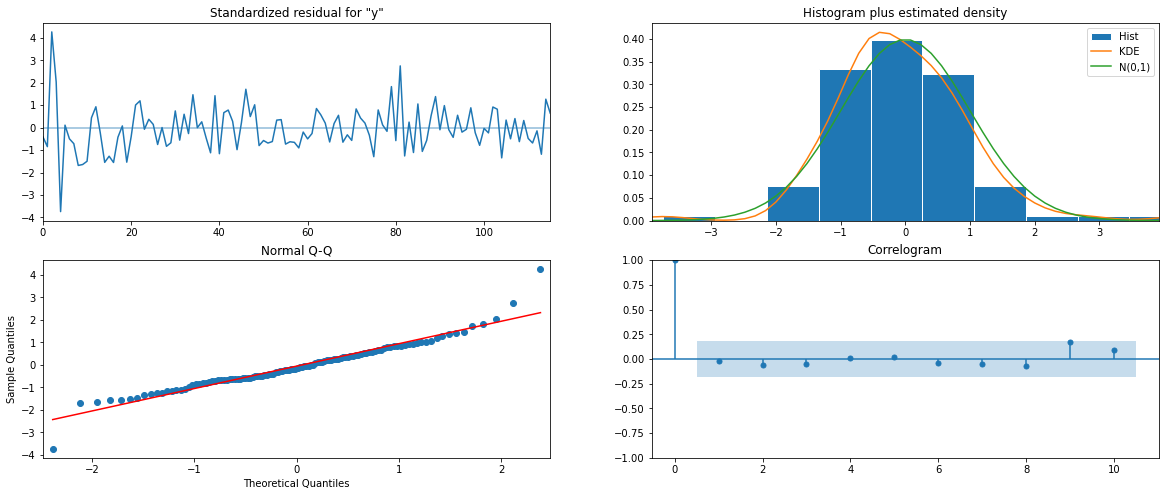

In [284]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

Predict on the Test Set using this model

In [285]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.844011,18.847631,25.903334,99.784689
1,67.632287,19.299541,29.805881,105.458693
2,74.748429,19.412100,36.701412,112.795445
3,71.327253,19.475034,33.156888,109.497619
4,76.019335,19.483309,37.832751,114.205918


In [286]:
rmse_model5_test = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

36.441015317676566


In [287]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
Regression,16.979414
Naive Model,78.396083
Simple Average Model,52.318735
2point Trailing Moving Average,12.298291
4 point Trailing Moving Average,15.845558
6point Trailing Moving Average,15.986163
9 point Trailing Moving Average,16.500823


Setting the seasonality as 12 for the second iteration of the auto SARIMA model

In [288]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [289]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [290]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.42308272074
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380896
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938645
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753178
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697561
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945897
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918325
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383723
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946335
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302509
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461675
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988261230512
SARIMA(0, 1, 2)x(0, 0, 0,

In [291]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686907
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [292]:
import statsmodels.api as sm
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 26 Mar 2023   AIC                            887.938
Time:                                    23:27:51   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.813     -0.004      0.996    -372.869     371.183
ma.L2         -0.1573     29.821   

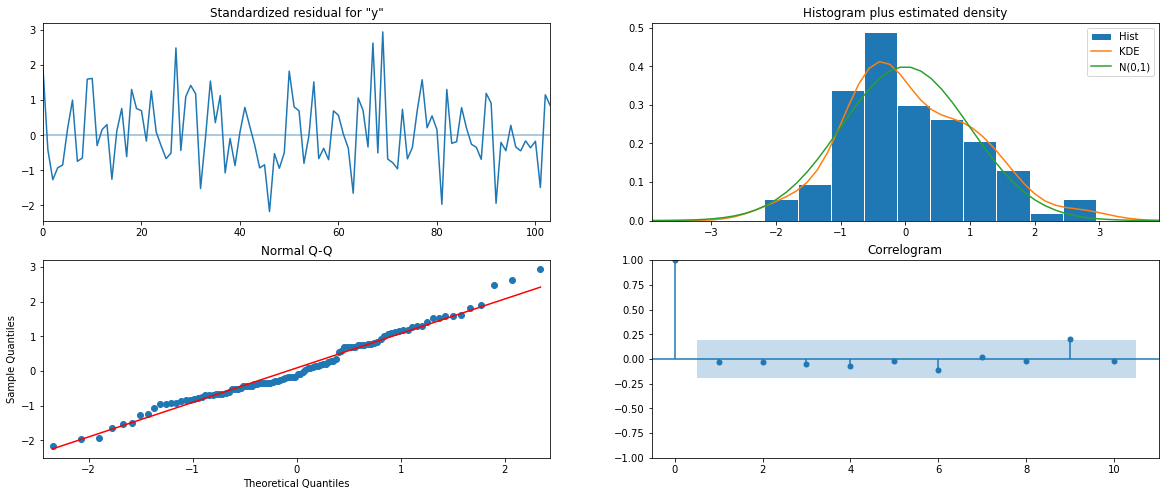

In [293]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Predict on the Test Set using this model

In [294]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867263,15.928501,31.647976,94.086551
1,70.541190,16.147659,38.892361,102.190019
2,77.356411,16.147656,45.707586,109.005235
3,76.208814,16.147656,44.559989,107.857638
4,72.747398,16.147656,41.098573,104.396222


Test Data - RMSE 

In [295]:
rmse_model5_12_test = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print("For SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model5_12_test))

For SARIMA on the Test Data,  RMSE is 26.417


In [296]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model5_12_test]},index=['SARIMA(0,1,2)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
Regression,16.979414
Naive Model,78.396083
Simple Average Model,52.318735
2point Trailing Moving Average,12.298291
4 point Trailing Moving Average,15.845558
6point Trailing Moving Average,15.986163
9 point Trailing Moving Average,16.500823


7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Arima manual

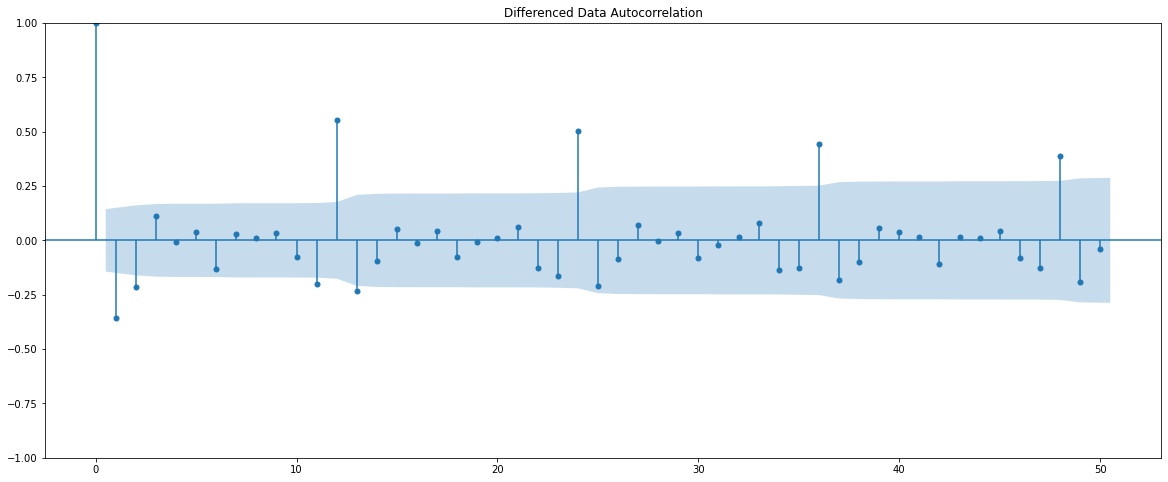

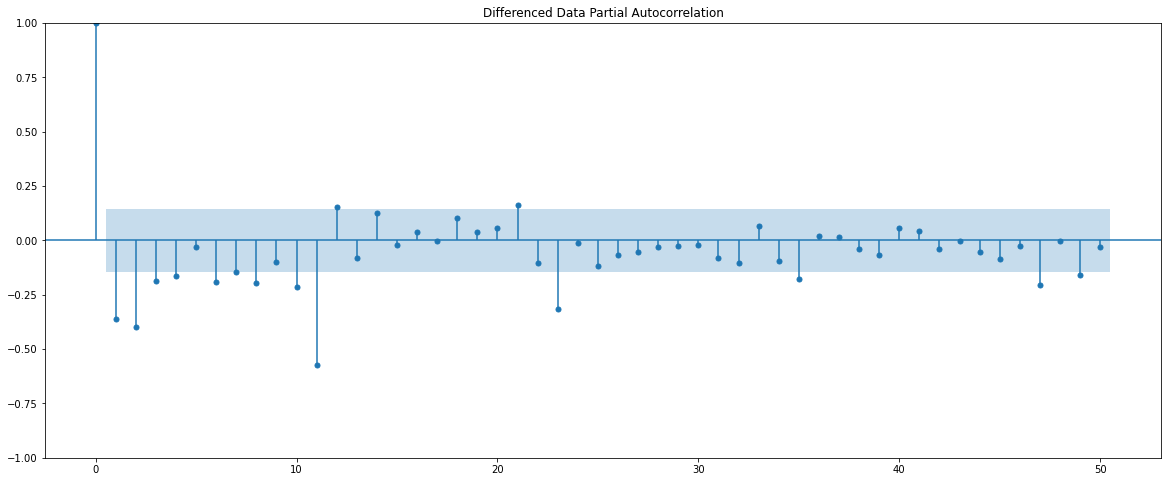

In [297]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [298]:
manual_ARIMA = sm.tsa.arima.ARIMA(train['Rose'].astype('float64'), order=(2,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 26 Mar 2023   AIC                           1281.871
Time:                        23:27:52   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

Predict on the Test Set using this model

Test Data - RMSE 

In [299]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse_model6_test = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print("For MANUAL ARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For MANUAL ARIMA on the Test Data,  RMSE is 36.012


In [300]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model6_test]},index=['MANUAL ARIMA(2,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
Regression,16.979414
Naive Model,78.396083
Simple Average Model,52.318735
2point Trailing Moving Average,12.298291
4 point Trailing Moving Average,15.845558
6point Trailing Moving Average,15.986163
9 point Trailing Moving Average,16.500823


Sarima Manual

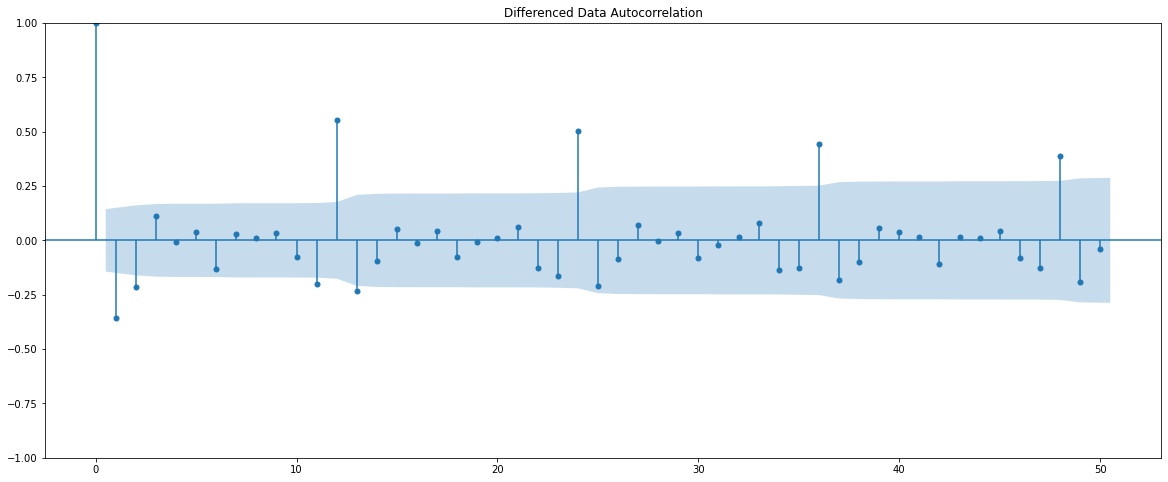

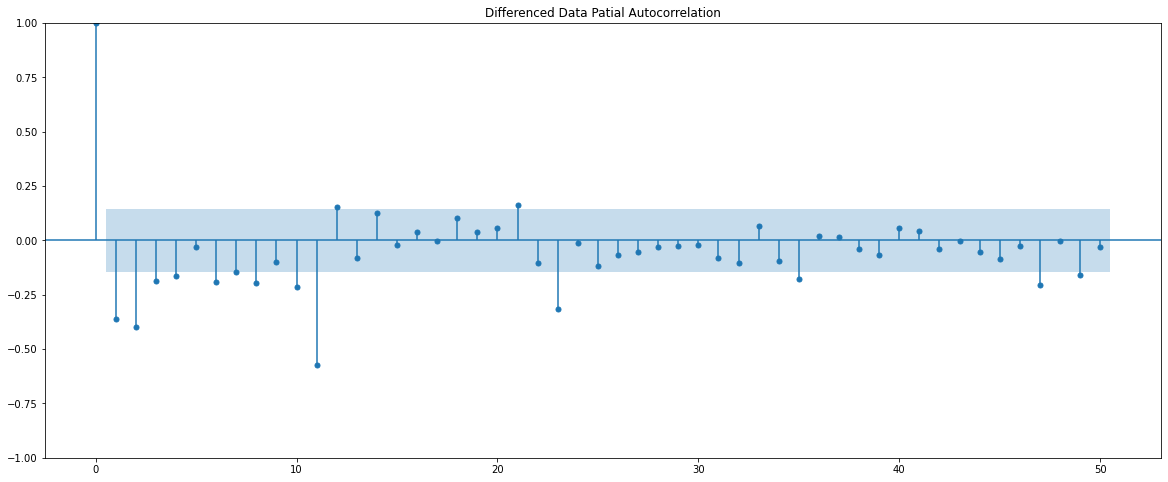

In [301]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

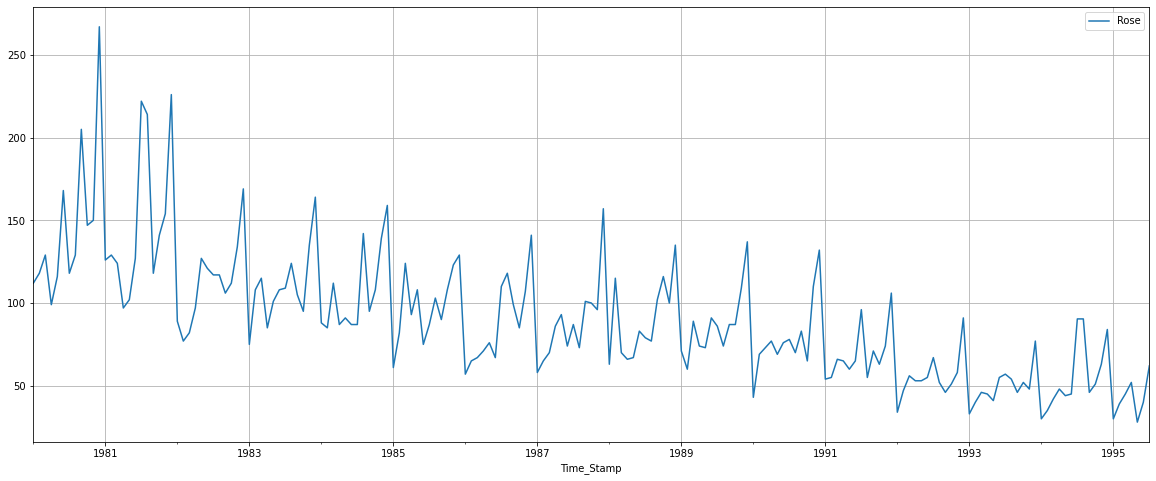

In [302]:
df.plot()
plt.grid();

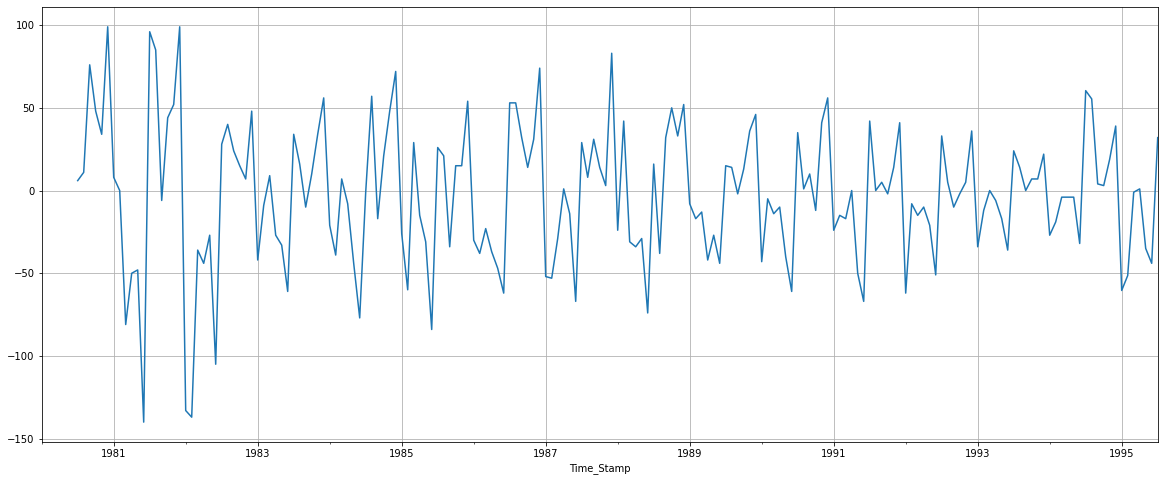

In [303]:
(df['Rose'].diff(6)).plot()
plt.grid();

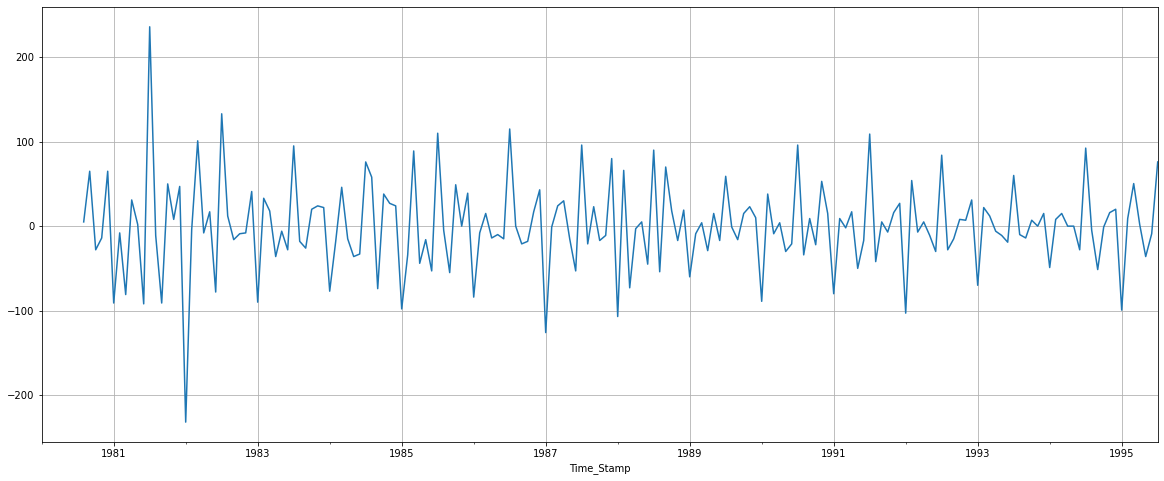

In [304]:
(df['Rose'].diff(6)).diff().plot()
plt.grid();

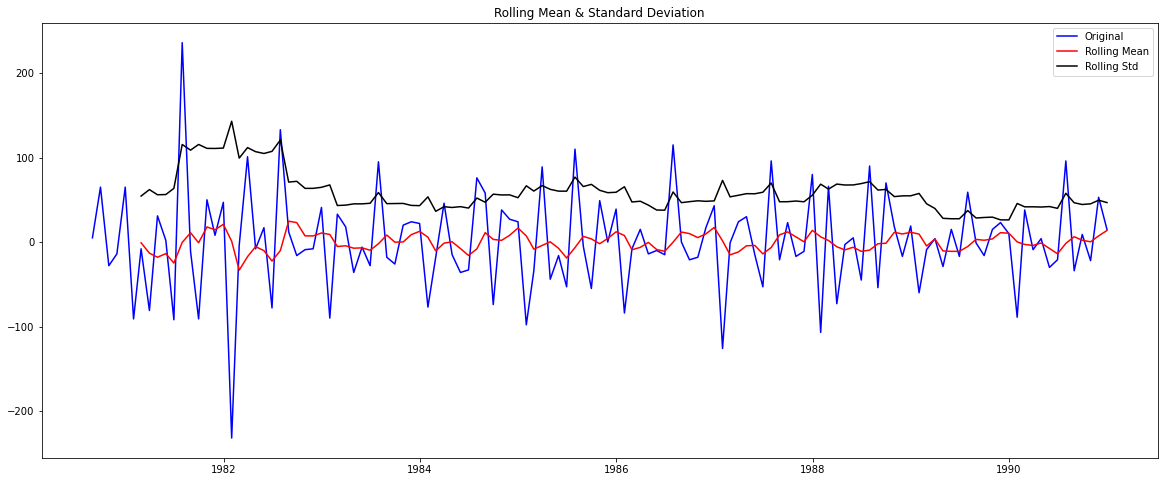

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [305]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots 

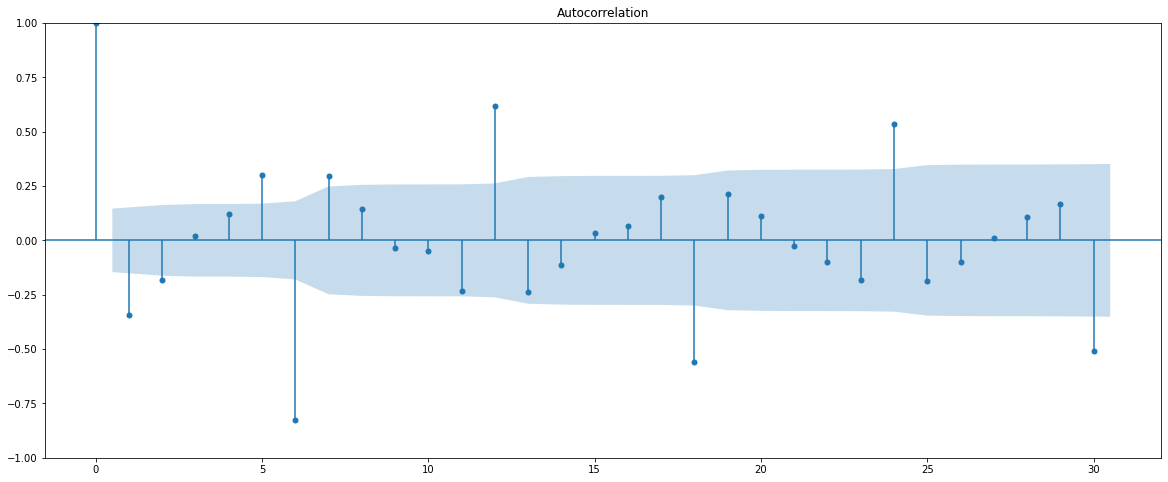

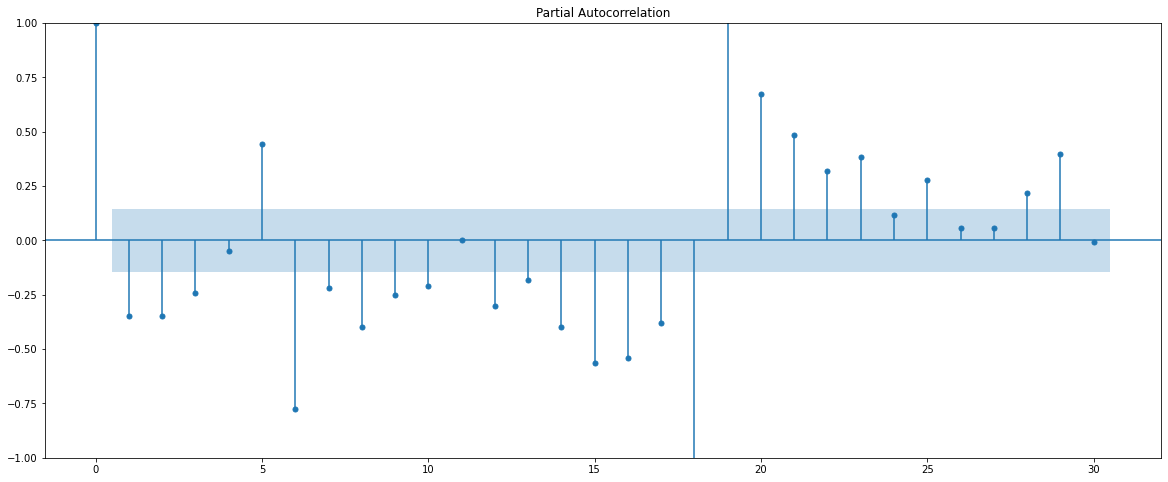

In [306]:
plot_acf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [307]:
import statsmodels.api as sm
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -513.610
Date:                           Sun, 26 Mar 2023   AIC                           1045.221
Time:                                   23:27:55   BIC                           1070.003
Sample:                                        0   HQIC                          1055.281
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0483      0.120      8.726      0.000       0.813       1.284
ar.L2         -0.2225      0.134     -1.658

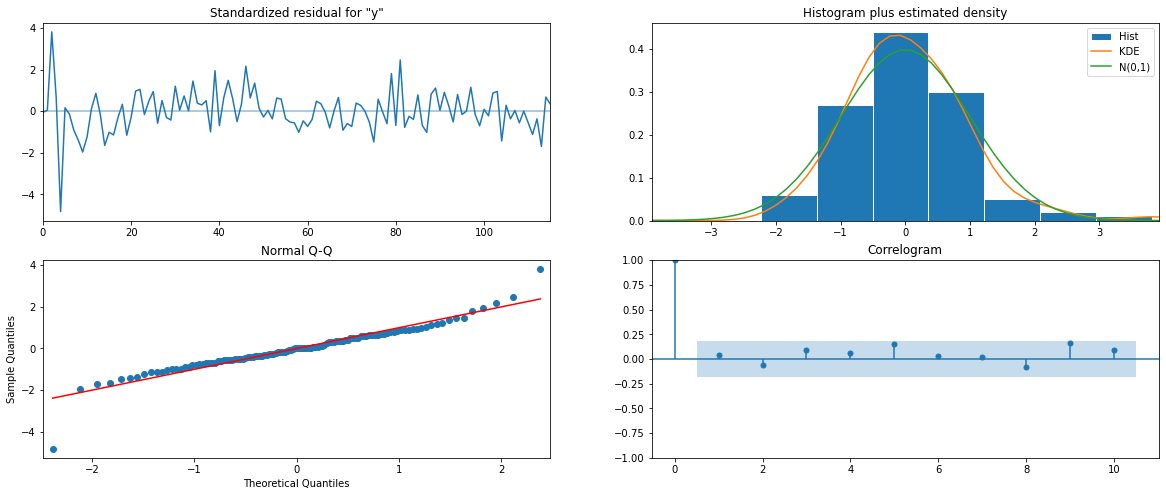

In [308]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

Predict on the Test Set using this model

In [309]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,76.090556,18.398183,40.030779,112.150332
1,74.400056,18.403392,38.330070,110.470042
2,81.941697,18.596233,45.493750,118.389643
3,76.185162,18.854251,39.231510,113.138814
4,80.875905,19.038961,43.560228,118.191582


Test Data - RMSE 

In [310]:
rmse_model7_test = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print("For MANUAL SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model7_test))

For MANUAL SARIMA on the Test Data,  RMSE is 29.599


In [311]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model7_test]},index=['MANUAL SARIMA(2,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
Regression,16.979414
Naive Model,78.396083
Simple Average Model,52.318735
2point Trailing Moving Average,12.298291
4 point Trailing Moving Average,15.845558
6point Trailing Moving Average,15.986163
9 point Trailing Moving Average,16.500823


Sarima at 12

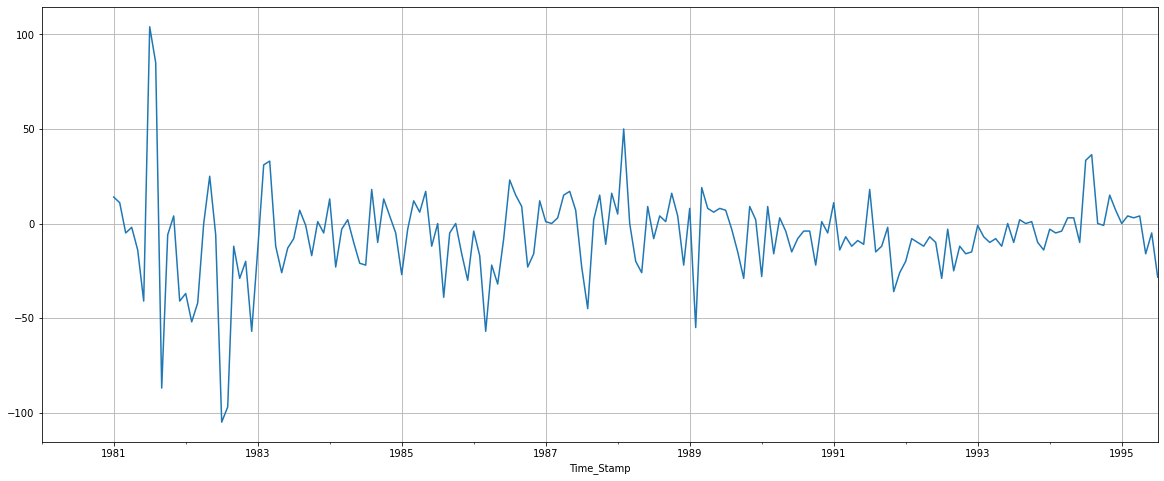

In [312]:
(df['Rose'].diff(12)).plot()
plt.grid();

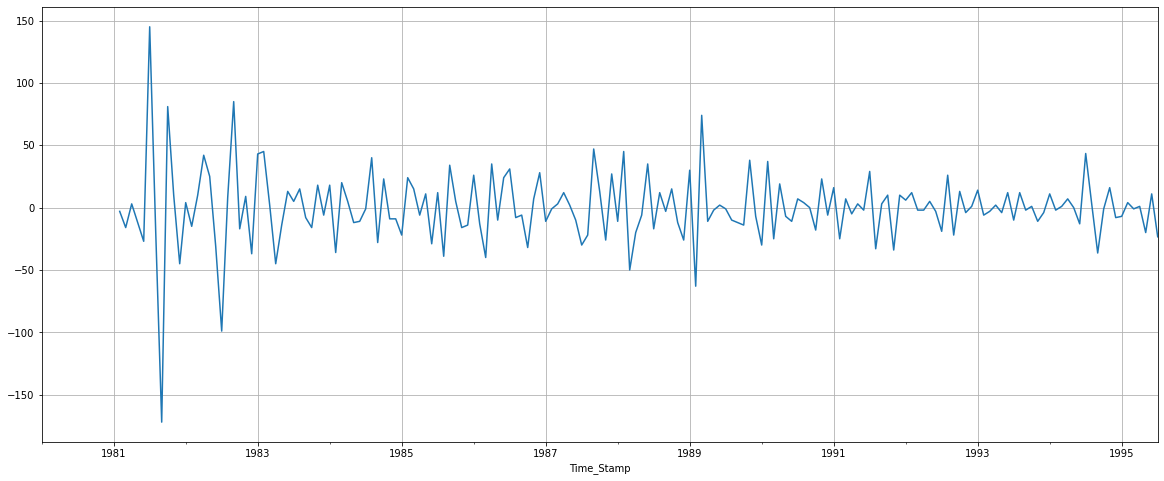

In [313]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

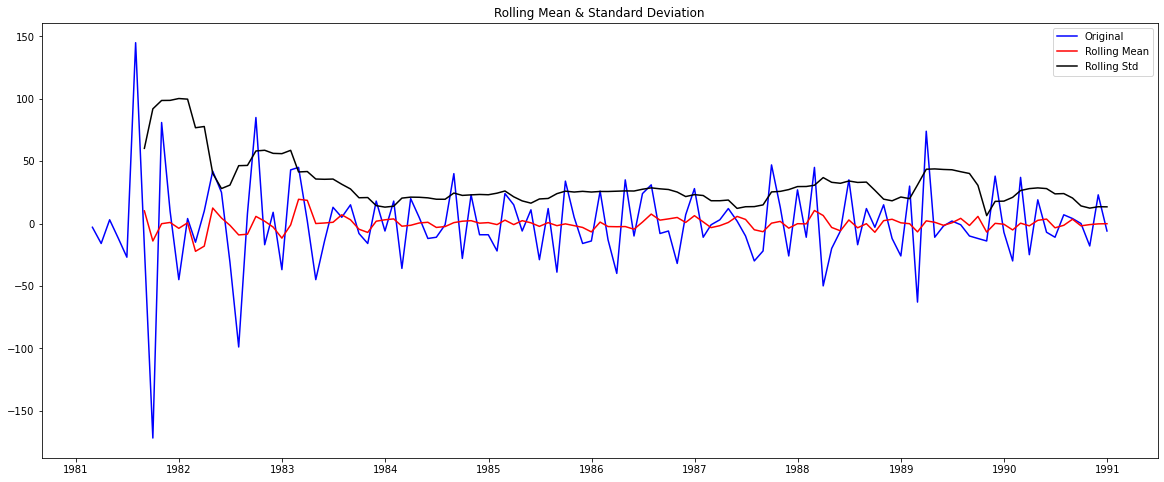

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [314]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

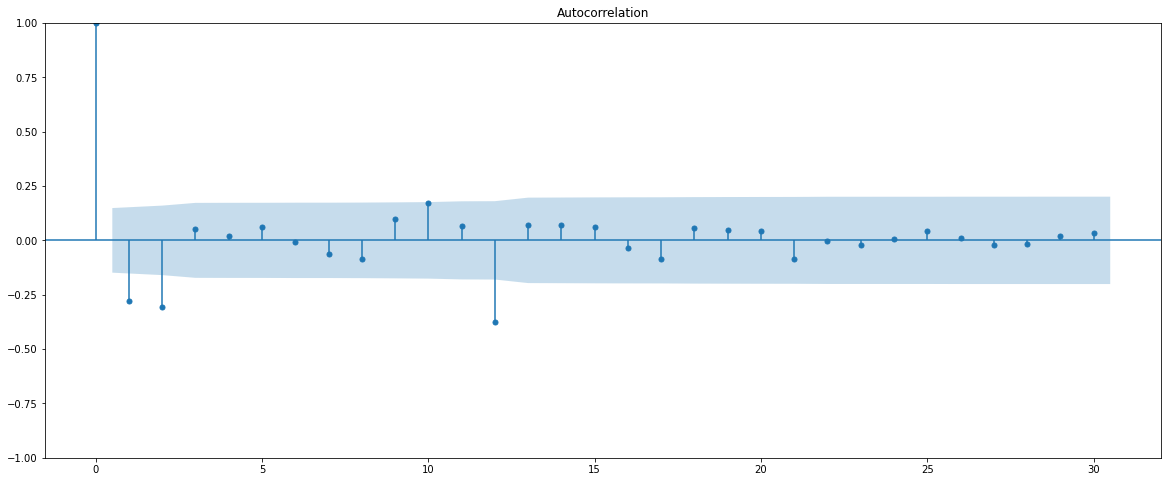

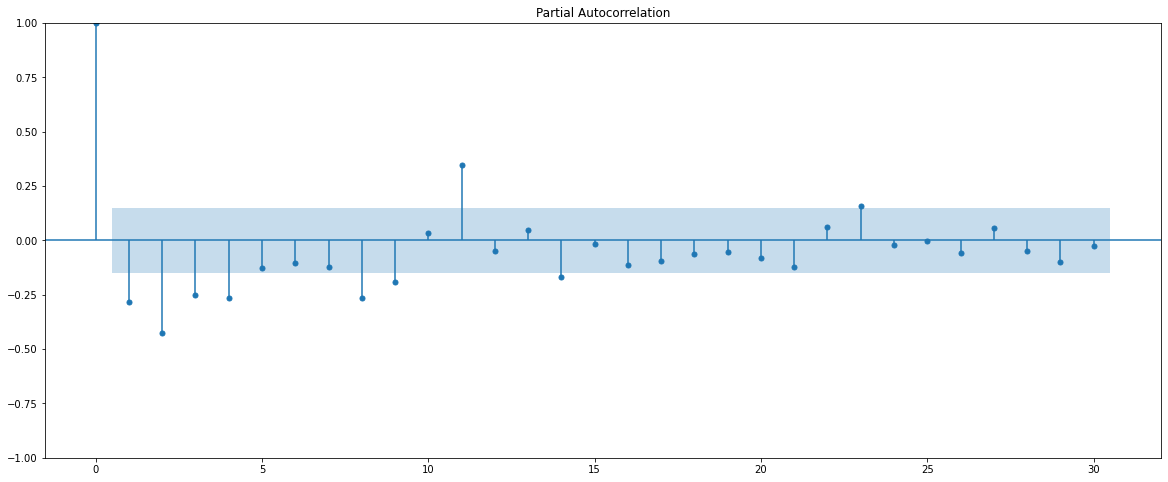

In [315]:
plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [316]:
import statsmodels.api as sm
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -513.610
Date:                           Sun, 26 Mar 2023   AIC                           1045.221
Time:                                   23:28:00   BIC                           1070.003
Sample:                                        0   HQIC                          1055.281
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0483      0.120      8.726      0.000       0.813       1.284
ar.L2         -0.2225      0.134     -1.658

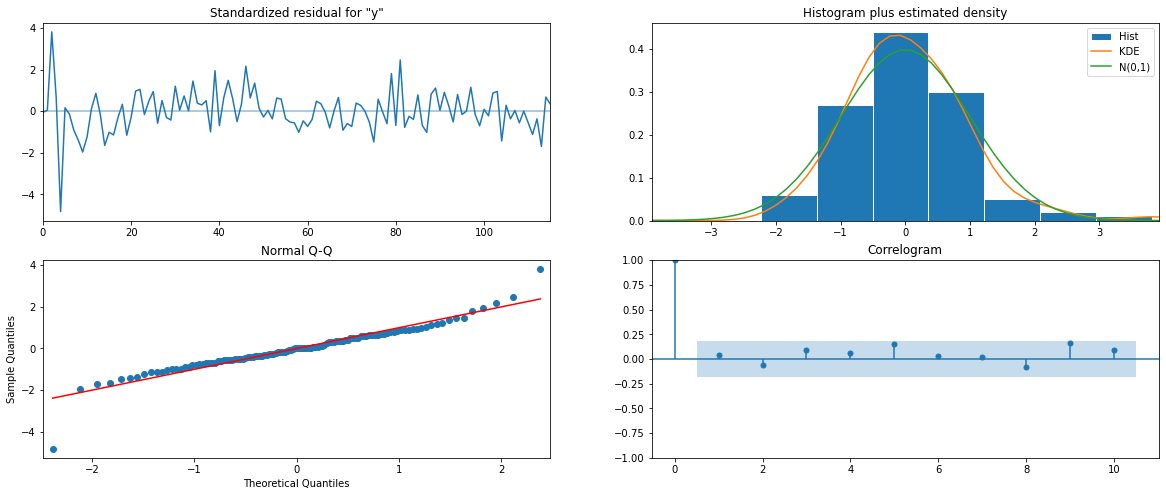

In [317]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

Predict on the Test Set using this model

In [318]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,76.090556,18.398183,40.030779,112.150332
1,74.400056,18.403392,38.330070,110.470042
2,81.941697,18.596233,45.493750,118.389643
3,76.185162,18.854251,39.231510,113.138814
4,80.875905,19.038961,43.560228,118.191582


Test Data - RMSE 

In [319]:
rmse_model8_test = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print("For MANUAL SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model8_test))

For MANUAL SARIMA on the Test Data,  RMSE is 29.599


In [320]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model8_test]},index=['MANUAL SARIMA(2,1,2)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.07, SES",35.936211
"Alpha= 1.908, Beta= 7.302, DES",16.979408
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
Regression,16.979414
Naive Model,78.396083
Simple Average Model,52.318735
2point Trailing Moving Average,12.298291
4 point Trailing Moving Average,15.845558
6point Trailing Moving Average,15.986163
9 point Trailing Moving Average,16.500823


8.Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [321]:
resultsDf.sort_values(by='Test RMSE')

,Test RMSE
2point Trailing Moving Average,12.298291
"Alpha=0.1, Beta=0.01, Gamma=0.5, TES",15.531988
4 point Trailing Moving Average,15.845558
6point Trailing Moving Average,15.986163
9 point Trailing Moving Average,16.500823
"Alpha= 1.908, Beta= 7.302, DES",16.979408
Regression,16.979414
"SARIMA(0,1,2)(2,0,2,12)",26.417374
"MANUAL SARIMA(2,1,2)(2,0,2,6)",29.599448
"MANUAL SARIMA(2,1,2)(2,0,2,12)",29.599448


9.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Building the most optimum model on the Full Data. 

In [322]:
fullmodel = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.01,
                                                                 smoothing_seasonal=0.5)

In [323]:
RMSE_fullmodel = mean_squared_error(df['Rose'],fullmodel.fittedvalues,squared=False)
print('RMSE:',RMSE_fullmodel)

RMSE: 18.970866798182428


In [324]:
prediction = fullmodel.forecast(steps=len(test))
prediction= fullmodel.forecast(steps=12)
prediction

1995-08-31    62.590902
1995-09-30    38.767712
1995-10-31    42.086721
1995-11-30    47.946786
1995-12-31    67.441286
1996-01-31    24.610164
1996-02-29    30.686067
1996-03-31    35.595239
1996-04-30    39.225276
1996-05-31    27.918648
1996-06-30    34.727798
1996-07-31    57.674436
Freq: M, dtype: float64

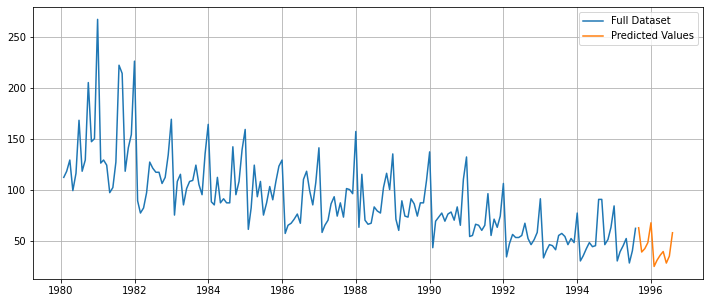

In [325]:
plt.figure(figsize=(12,5))
plt.plot(df['Rose'],label='Full Dataset')
plt.plot(prediction,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

In [326]:
pred_df = pd.DataFrame({'lower_CI':prediction - ((np.percentile(prediction,[2.5,97.5])))[0],
                          'prediction':prediction,
                          'upper_ci': prediction + ((np.percentile(prediction,[2.5,97.5])))[1]})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,37.070905,62.590902,128.698332
1995-09-30,13.247715,38.767712,104.875142
1995-10-31,16.566724,42.086721,108.194151
1995-11-30,22.426789,47.946786,114.054216
1995-12-31,41.921289,67.441286,133.548716


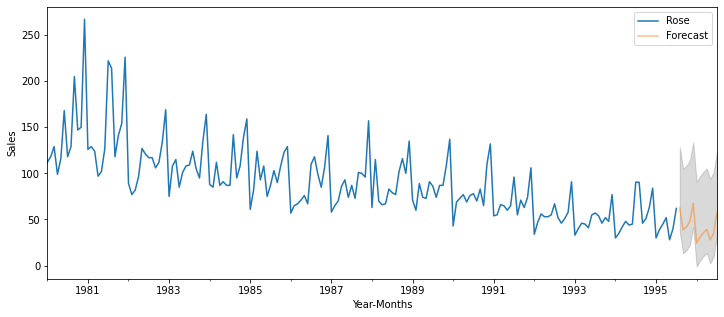

In [327]:
axis = df.plot(label='Actual', figsize=(12,5))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

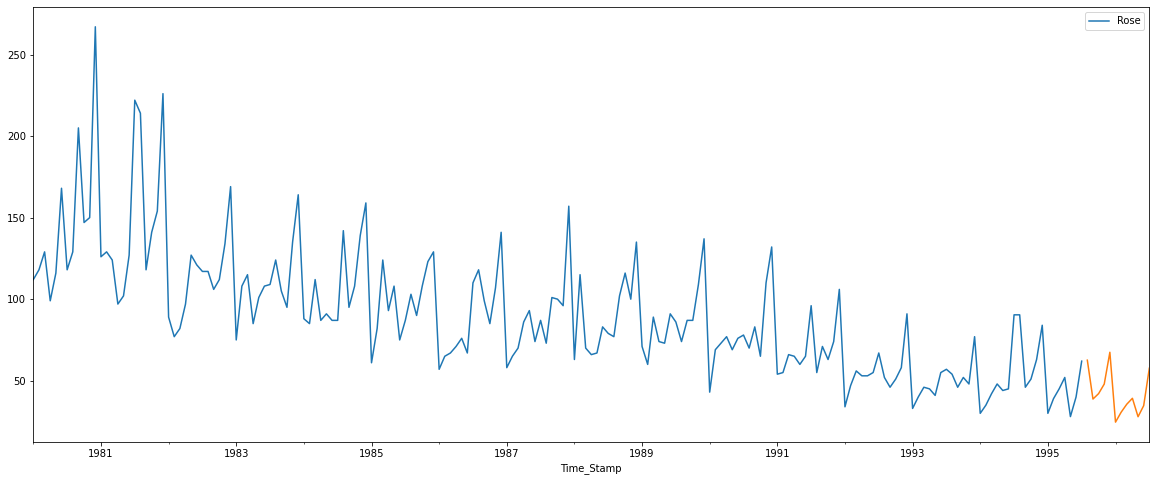

In [328]:
df.plot()
prediction.plot();